In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

 # Data Preparation

In [2]:
# Read the AMD Historical Closing Prices
amd_data = Path("../Resources/amd_historical.csv")
amd = pd.read_csv(
    amd_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
amd.head()

Symbol   NOCP
Trade DATE              
2019-05-13    AMD  26.24
2019-05-10    AMD  27.96
2019-05-09    AMD  27.21
2019-05-08    AMD  27.09
2019-05-07    AMD  26.66

In [3]:
# Read the MU Historical Closing Prices
mu_data = Path("../Resources/mu_historical.csv")
mu = pd.read_csv(
    mu_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
mu.head()

Symbol   NOCP
Trade DATE              
2019-05-13     MU  37.38
2019-05-10     MU  38.94
2019-05-09     MU  39.27
2019-05-08     MU  39.75
2019-05-07     MU  40.26

In [4]:
# Create a new pivot table where the columns are the closing prices for each ticker
all_prices= pd.concat([amd,mu], axis= 'rows', join= 'inner')
all_prices= all_prices.reset_index()
all_prices= all_prices.pivot_table(values= 'NOCP', index= 'Trade DATE', columns= 'Symbol')
all_prices.head()

Symbol        AMD     MU
Trade DATE              
2018-05-15  12.45  54.01
2018-05-16  12.82  56.50
2018-05-17  12.82  54.70
2018-05-18  13.00  53.39
2018-05-21  12.99  55.48

 # Portfolio Returns

In [5]:
returns= all_prices.pct_change()
returns

Symbol           AMD        MU
Trade DATE                    
2018-05-15       NaN       NaN
2018-05-16  0.029719  0.046103
2018-05-17  0.000000 -0.031858
2018-05-18  0.014041 -0.023949
2018-05-21 -0.000769  0.039146
...              ...       ...
2019-05-07 -0.027717 -0.044386
2019-05-08  0.016129 -0.012668
2019-05-09  0.004430 -0.012075
2019-05-10  0.027563 -0.008403
2019-05-13 -0.061516 -0.040062

[250 rows x 2 columns]

In [6]:
amd_weight= 0.5
mu_weight= 0.5

port_returns= amd_weight*returns['AMD']+ mu_weight*returns['MU']
port_returns

Trade DATE
2018-05-15         NaN
2018-05-16    0.037911
2018-05-17   -0.015929
2018-05-18   -0.004954
2018-05-21    0.019188
                ...   
2019-05-07   -0.036052
2019-05-08    0.001731
2019-05-09   -0.003823
2019-05-10    0.009580
2019-05-13   -0.050789
Length: 250, dtype: float64

In [8]:
weights= [0.5,0.5]
port_returns= returns.dot(weights)
port_returns.head()

Trade DATE
2018-05-15         NaN
2018-05-16    0.037911
2018-05-17   -0.015929
2018-05-18   -0.004954
2018-05-21    0.019188
dtype: float64

 # Risk Management

In [9]:
volatility= returns.std()*np.sqrt(252)
volatility

Symbol
AMD    0.682623
MU     0.461623
dtype: float64

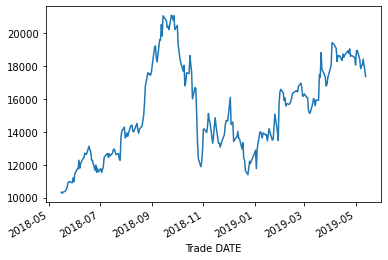

In [10]:
initial_investment = 10000
weights = [0.8, 0.2]
port_returns= returns.dot(weights)
cum_returns= (1+port_returns).cumprod()
(initial_investment*cum_returns).plot()

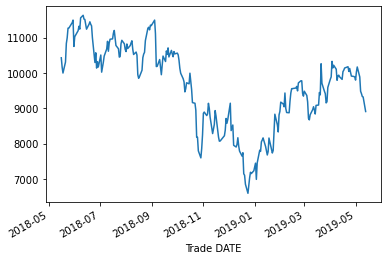

In [11]:
initial_investment = 10000
weights = [0.2, 0.8]
port_returns= returns.dot(weights)
cum_returns= (1+port_returns).cumprod()
(initial_investment*cum_returns).plot()